In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #if using matplotlib
import geopandas as gpd
import plotly.express as px
import pyproj
import json
import imageio

In [3]:
fp = "../Data/StateShapeFiles/historicalstates/US_HistStateTerr_Gen001.shx"
#fp = "../Data/StateShapeFiles/historicalcounties/US_HistCounties_Gen01.shx"
map_df = gpd.read_file(fp)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

In [4]:
map_df = map_df[map_df['CITATION'].apply(lambda x: 'declaration of independence' in x.lower())]

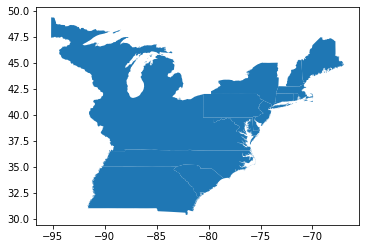

In [5]:
fig, ax = plt.subplots(1, 1)
map_df.plot(figsize=(800, 300), ax = ax)
plt.show()

In [6]:
with open('state_abbrev.json') as json_file:
    us_state_to_abbrev = json.load(json_file)

In [7]:
map_df['STATE'] = map_df['NAME'].apply(lambda x: us_state_to_abbrev[x])

In [11]:
debt_data = pd.read_csv("statewise_all_assets_rep.csv", index_col = 0)

In [12]:
df_merged = map_df.merge(debt_data, left_on=['STATE'], right_on=['state'])

In [13]:
df_merged.fillna(0, inplace = True)

In [14]:
df_merged

,ID_NUM,NAME,ID,VERSION,START_DATE,END_DATE,CHANGE,CITATION,START_N,END_N,...,State Liquidated pct,Pierce pct,CD pct,ASD pct,pre1790 total (pop adj),post1790 total (pop adj),pre1790 pct (pop adj),post1790 pct (pop adj),total asset dif (pop adj),total asset pct dif (pop adj)
0,22,Connecticut,ct_state,1,1783-09-03,1786-09-13,Connecticut became an independent state on 4 J...,(Declaration of Independence),17830903,17860913,...,0.02,0.14,0.12,0.09,13.86,8.86,8.64,9.75,-5.00,1.11
1,28,Delaware,de_state,1,1783-09-03,2000-12-31,"The three Lower Counties, of KENT, NEW CASTLE,...","(Declaration of Independence; Swindler, 2:197)",17830903,20001231,...,0.02,0.02,0.00,0.00,9.40,0.36,5.85,0.40,-9.04,-5.46
2,42,Georgia,ga_state,1,1783-09-03,1798-04-06,Georgia became an independent state on 4 July ...,(Declaration of Independence),17830903,17980406,...,0.00,0.01,0.00,0.00,3.99,0.39,2.48,0.43,-3.60,-2.05
3,76,Massachusetts,ma_state,1,1783-09-03,1804-12-30,"Massachusetts, including the area of Maine, be...",(Declaration of Independence),17830903,18041230,...,0.05,0.27,0.01,0.01,21.52,0.65,13.40,0.72,-20.86,-12.68
4,81,Maryland,md_state,1,1783-09-03,1791-03-29,Maryland became an independent state on 4 July...,(Declaration of Independence),17830903,17910329,...,0.00,0.07,0.13,0.04,4.71,7.79,2.94,8.57,3.08,5.64
5,116,North Carolina,nc_state,1,1783-09-03,1790-04-01,North Carolina became an independent state on ...,(Declaration of Independence),17830903,17900401,...,0.00,0.04,0.00,0.01,1.67,0.36,1.04,0.40,-1.31,-0.64
6,128,New Hampshire,nh_state,1,1783-09-03,2000-12-31,New Hampshire became an independent state on 4...,(Declaration of Independence),17830903,20001231,...,0.00,0.05,0.02,0.00,11.13,4.38,6.93,4.82,-6.74,-2.11
7,129,New Jersey,nj_state,1,1783-09-03,2000-12-31,New Jersey became an independent state on 4 Ju...,(Declaration of Independence),17830903,20001231,...,0.21,0.06,0.00,0.00,24.97,0.38,15.56,0.42,-24.59,-15.14
8,143,New York,ny_state,1,1783-09-03,1855-01-10,New York became an independent state on 4 July...,(Declaration of Independence),17830903,18550110,...,0.42,0.09,0.00,0.11,32.82,2.33,20.45,2.57,-30.49,-17.88
9,143,New York,ny_state,1,1783-09-03,1855-01-10,New York became an independent state on 4 July...,(Declaration of Independence),17830903,18550110,...,0.00,0.00,0.17,0.44,0.00,20.47,0.00,22.53,20.47,22.53


In [17]:
df_merged.columns

Index(['ID_NUM', 'NAME', 'ID', 'VERSION', 'START_DATE', 'END_DATE', 'CHANGE',
       'CITATION', 'START_N', 'END_N', 'AREA_SQMI', 'TERR_TYPE', 'FULL_NAME',
       'ABBR_NAME', 'NAME_START', 'geometry', 'STATE', 'state',
       'Loan Office Certificates Specie Value',
       'State Liquidated Debt Dollars', 'Pierce Certificates Value',
       'pre1790 total', 'ASD Total', 'CD Total', 'post1790 total', 'pop',
       'pre1790 pct', 'post1790 pct', 'total asset dif',
       'total asset dif (adj)', 'total asset pct dif', 'Loan Office pct',
       'State Liquidated pct', 'Pierce pct', 'CD pct', 'ASD pct',
       'pre1790 total (pop adj)', 'post1790 total (pop adj)',
       'pre1790 pct (pop adj)', 'post1790 pct (pop adj)',
       'total asset dif (pop adj)', 'total asset pct dif (pop adj)'],
      dtype='object')

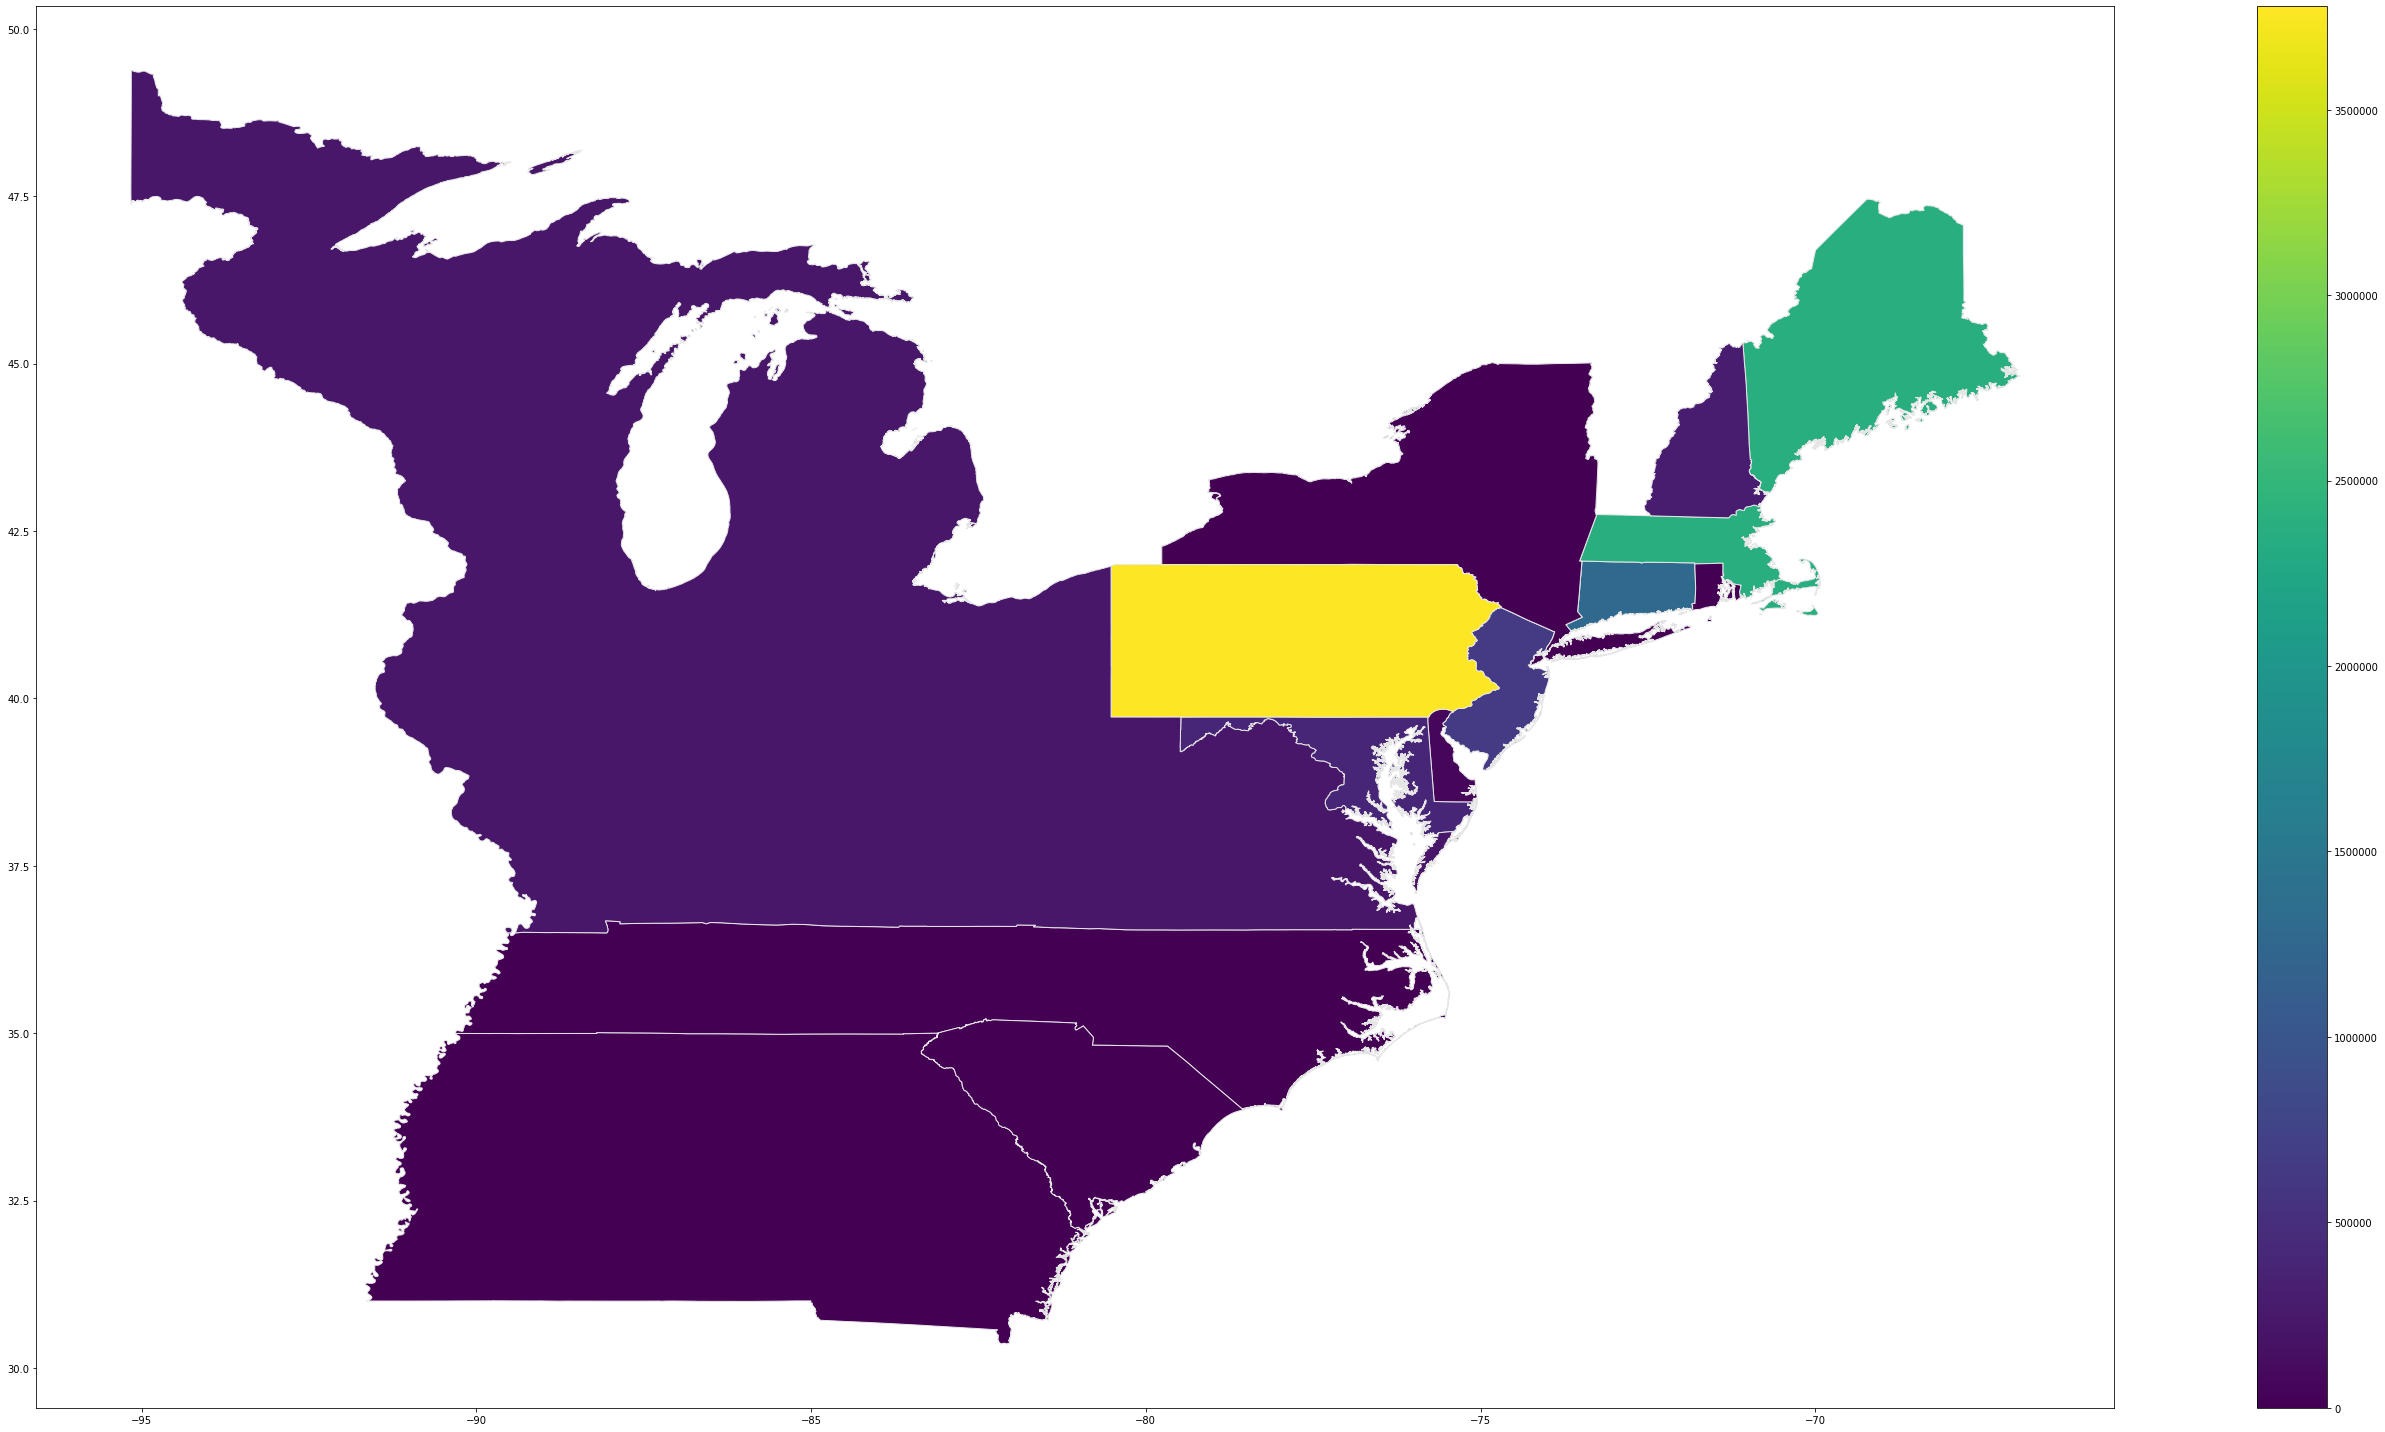

In [18]:
fig2, ax2 = plt.subplots(1, figsize = (40, 20))
fig = df_merged.plot(column='Loan Office Certificates Specie Value', linewidth=1, ax=ax2, edgecolor='0.9', legend = True)
plt.tight_layout()